# Assigment 5 - Bayesian Classifier and Gaussian Mixture Models

In the 5th assigment of the class we will study the Bayes Classifier.  

We will start with a quick demonstration of Gaussian Mixture Models with sklearn.

You have to implement two different variants of the bayes classifier using the assumption that the conditional probability P(x|y):
   1. Gaussian Bayes Classifier. P(x|y) ~ Gaussian Distribution (Normal)
   2. Gaussian Mixture Bayes Classifier. P(x|y) ~ Gaussian Mixture Model  

# A. Demonstration Gaussian mixture model

#### 1 . Probability density function (pdf) of Multivariate Gaussian Distribution:

$${ f_{\mathbf {X} }(x_{1},\ldots ,x_{k}; \mu,\Sigma)={\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}}$$


$$\Sigma \text{: is the covariance matrix} $$
$$\mu \text{: mean of the distribution} $$

In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import numpy as np

# example of the multi variate normal distribution with scipy
mean = [0, 0]
cov = [[1, 0],
       [0, 1]]
dist = mvn(mean=mean, cov=cov)
x = [0, 0]
print("CDF:", dist.pdf(x))

CDF: 0.15915494309189535


#### 2. in the case of mixture of gaussian model the final Probability density function is as bellow:

$$f_{GMM}(x_{1},\ldots ,x_{k})= \sum_{i=1}^{k} w_k f_{\mathbf {X} }(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$


The model can be fit using the EM algorithm to find our parameters :
 1. $ w_k $ : weight of each gaussian, or the prior probability of the gaussian k, p(k)
 1. $ \mu_k $ : the mean of each the gaussian 
 1. $ \Sigma_k $: the covariance of each gaussian

lets generate some data

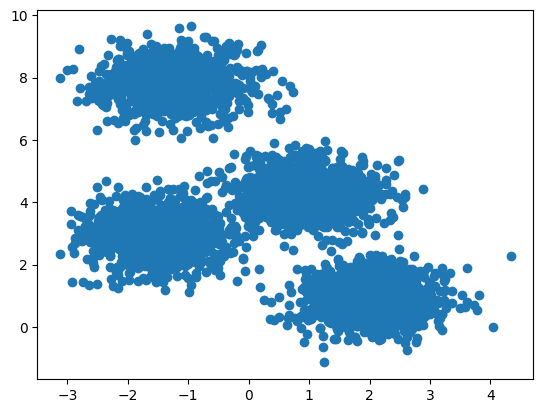

In [5]:
from sklearn.datasets._samples_generator import make_blobs
import matplotlib.pyplot as plt

# generate some data
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()
plt.close()

In [6]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

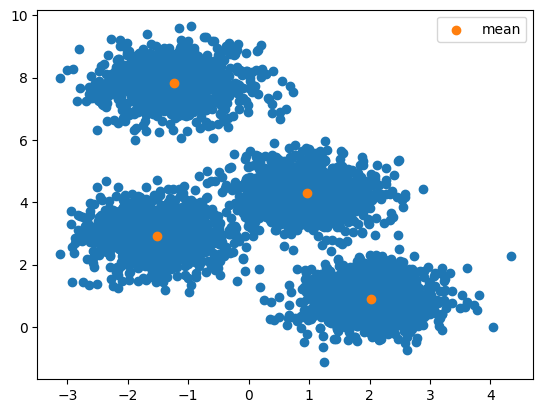

In [7]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], label="mean")
plt.legend()
plt.show()
plt.close()

In [8]:
# weights of each Gaussian i.e p(k)
w_k = gmm.weights_
w_k

array([0.24995563, 0.24928842, 0.25065202, 0.25010392])

In [9]:
# mean of each gaussian
means = gmm.means_
means

array([[-1.23824476,  7.81555656],
       [ 0.95919476,  4.29696274],
       [-1.5205758 ,  2.92071074],
       [ 2.01630043,  0.90234062]])

In [10]:
# mean of each gaussian
cov = gmm.covariances_
cov

array([[[ 0.37956024, -0.00096594],
        [-0.00096594,  0.33053861]],

       [[ 0.34150938, -0.00421972],
        [-0.00421972,  0.34663498]],

       [[ 0.35307953, -0.00442887],
        [-0.00442887,  0.36458914]],

       [[ 0.3521316 , -0.00251558],
        [-0.00251558,  0.34816653]]])

In [11]:
# the probability of p(k | x)
gmm.predict_proba(X)

array([[4.61018929e-19, 1.59444189e-06, 9.99998405e-01, 7.08701722e-10],
       [1.00000000e+00, 7.58871885e-13, 1.19436256e-12, 4.57355882e-38],
       [2.16336398e-21, 5.34487544e-04, 9.99223598e-01, 2.41914213e-04],
       ...,
       [1.04008839e-46, 1.48901568e-12, 2.67613974e-13, 1.00000000e+00],
       [7.44482445e-20, 1.39815406e-05, 9.99985949e-01, 6.96553464e-08],
       [3.37134949e-38, 3.25121456e-08, 2.17668488e-14, 9.99999967e-01]])

# Probability Density Function of Gaussian Mixture Model

$$f_{GMM}(x_{1},\ldots ,x_{k})= \sum_{i=1}^{k} w_k f_{\mathbf {X} }(x_{1},\ldots ,x_{k};  \mu_i,\Sigma_i),s.t  \sum_{i=1}^{k} w_k  = 1$$

In [12]:
# pdf of gmm
x = (0, 0)


def pdf_mixture(x, w, means, cov):
    n_componets = len(means)
    p_x = 0
    for k in range(n_componets):
        p_x += w[k] * mvn(mean=means[k], cov=cov[k]).pdf(x)
    return p_x

In [13]:
pdf_mixture(x, w_k, means, cov)

0.00010584089218250922

In [14]:
# notes 1.  if we use covariance_type="diag" the covariance metrix is diagonal

In [15]:
gmm = GaussianMixture(n_components=4, random_state=0, covariance_type="diag")
gmm.fit(X)

GaussianMixture(covariance_type='diag', n_components=4, random_state=0)

In [16]:
# so the cov in a list with the components of the diagonal
gmm.covariances_

array([[0.35306517, 0.36506761],
       [0.37956783, 0.33056489],
       [0.35218237, 0.34835942],
       [0.34120551, 0.34680435]])

In [17]:
# the covariance in case of full matrix
cov

array([[[ 0.37956024, -0.00096594],
        [-0.00096594,  0.33053861]],

       [[ 0.34150938, -0.00421972],
        [-0.00421972,  0.34663498]],

       [[ 0.35307953, -0.00442887],
        [-0.00442887,  0.36458914]],

       [[ 0.3521316 , -0.00251558],
        [-0.00251558,  0.34816653]]])

# Step 1. Bayesian Classifier with Gaussian Model

We begin with the implementation of the Gaussian Naive Bayes Classifier.

In the naive Bayes Classifier you have to calculate:
1. the prior for each class p(y)
2. the parameters of the gaussian distribution for each class y in order to model p(x|y) according to their empirical values
3. use the bayes theorem to predict the p(y|x) 

After obtain the parameter we can get posterior. The final prediction of our model can be the class with the maximum posterior.

Fill the class below and use it to:   
1. fit your model using .fit() method
2. get the propabilities of each class for the different X using .predict_proba() method
3. make the final predictions using the .predict() method and calculate the accuracy of your model

# solution

In the Bayesian Classifier we use the bayes theorem to calculate p(y|x):

$$ p(y|x) = \frac{p(x|y) * p(y)}{p(x)} =>$$ 

$$ p(y|x) = \frac{p(x|y) * p(y)}{\sum_{y'}p(x|y')p(y')} $$ 

In the Gaussian Naive Bayes Classifier we assume that p(x|y) is a gaussian distribution.

So to fit the model want:
1. calculate the prior p(y) by calculating the percentage of samples in each class y.
2. For the likehood, gaussian naive bayes classifier assume that the p(x|y) is a gaussian distribution. So find the parameters of the gaussian p(x|y) (mean and covariance matrix) for each class y. We can do this by calculating the emprical mean and covariance matrix of x for each class y.
3. then use the bayes theorem to calculate p(y|x)

In [18]:
class GaussianNaiveBayesClassifier:
    """
    Implementation of Naive Bayes Classifier
    """

    def __init__(self):
        # initialization of required variables.
        self.models = None  # p(x|y)
        self.prior = None  # p(y)
        self.classes = None # the classes
        self.n_classes = None # number of classes
        self.n_features = None # dimension of the features

    def fit(self, X, y):
        """
        Calculate the parameters of the gaussian models for each class i.e P(x|y), as well as the prior class probabilities P(y).
        :param X: The input features
        :param y: The labels
        :return: nothing
        """
        self.n_features = X.shape[1]
        num_of_points= X.shape[0]
        
        self.classes = list(set(y))
        self.n_classes = len(set(y))
        
        #
        self.prior = np.zeros(self.n_classes)
        self.models = []
        for y_index in range(self.n_classes):
            
            class_y = self.classes[y_index]
            # 1. Calculate the prior P(y) for each class
            p_y = (y == class_y).sum()/ num_of_points
            self.prior[y_index] =  p_y
            
            # 2. Calculate the different model P(x|y)
            # we will find the parameters of the gaussian for each class
            data_x_y = X[y == class_y] # get the data that only in class y
            
            mean_x_y = np.mean(data_x_y, axis=0) # calculate the mean
            cov_x_y = np.cov(data_x_y, rowvar=False) # calculate the covariance matrix, Note that you have to set rowvar=False
            diag_cov_x_y = np.diag(cov_x_y) # get the diagonal as the naive bayes implies
            
            self.models += [mvn(mean=mean_x_y, cov=diag_cov_x_y)] # add the model p(x|y) in your model list
        
    def predict_proba(self, X):
        """
        Calculate the posterior probability of each class given the features, i.e. P(y|x).
        You can calculate this with Bayes's theorem:
                    P(y|x) = P(x|y) P(y) / P(x).
                    P(y|x): The Posterior probability
                    P(x|y): The Likelihood probability
                    P(y): Prior probability
                    P(x): The evidence \sum_{y'} P(x|y') P(y')
        :param X:
        :return:
        """
        # get general information
        n_examples = X.shape[0]

        # initialise posterior
        posterior = np.zeros([self.n_classes, n_examples])
        
        # numerator: p(x|y)p(y)
        numerator = np.zeros((n_examples,self.n_classes))
        
        # calculate p(x|y) p(y) for each y
        for y_index in range(self.n_classes):
            # calculate p(x|y=tmp_y) * p(y_tmp) for all the examples
            p_x_y = self.models[y_index].pdf(X)# p(x|y)
            p_y = self.prior[y_index] # p(y)
            numerator[:, y_index] = p_x_y * p_y # p(x|y) p(y)
        
        # denominator aka evidence p(x) = \sum_{y'} P(x|y') P(y')
        denominator = np.sum(numerator, axis=1) #  so is the sum of the numerator
        
        posterior = numerator / denominator.reshape(-1,1)
        return posterior
    

    def predict(self, X):
        """
        Make predicted class with the maximum posterior P(y|x)
        :param X:
        :return: the predicted class
        hint: use the predict_proba class
        """
        posterior = self.predict_proba(X)
        prediction = np.argmax(posterior, axis=1)
        return prediction

In [19]:
# let's generate some data to use to train our models
centers = [(-10, 5), (0, 0), (0, 10), (-7, 10)]
X_y_0, _ = make_blobs(n_samples=4000, centers=centers, cluster_std=1.00, random_state=0)
centers = [(-5, 5), (-5, -2)]
X_y_1, _ = make_blobs(n_samples=2000, centers=centers, cluster_std=1.00, random_state=0)
X = np.concatenate([X_y_0, X_y_1], axis=0)
Y = np.concatenate([[0] * 4000, [1] * 2000], axis=0)

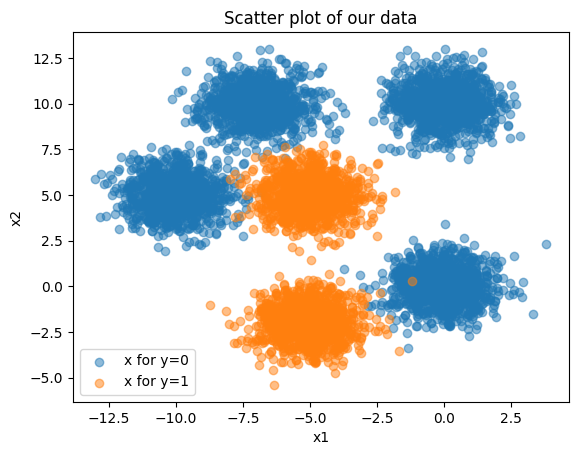

In [20]:
# plt.scatter(X[:,0], X[:,1], color =["r" if y == 1 else "g" for y in Y], alpha = 0.5)
plt.figure()
plt.title("Scatter plot of our data")
plt.scatter(X_y_0[:, 0], X_y_0[:, 1], alpha=0.5, label="x for y=0")
plt.scatter(X_y_1[:, 0], X_y_1[:, 1], alpha=0.5, label="x for y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [21]:
# initial the classifier object
gaussian_naive_bayes = GaussianNaiveBayesClassifier()

# fit the model
gaussian_naive_bayes.fit(X=X,y=Y)

In [23]:
# get predict propabilities for each class
posterior = gaussian_naive_bayes.predict_proba(X)
posterior

array([[9.99989565e-01, 1.04354787e-05],
       [9.99565729e-01, 4.34271483e-04],
       [9.35162411e-01, 6.48375888e-02],
       ...,
       [3.58796337e-01, 6.41203663e-01],
       [5.32242871e-01, 4.67757129e-01],
       [4.34743148e-01, 5.65256852e-01]])

In [24]:
# get predict propabilities for each class
y_pred = gaussian_naive_bayes.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = Y, y_pred=y_pred)

0.9421666666666667

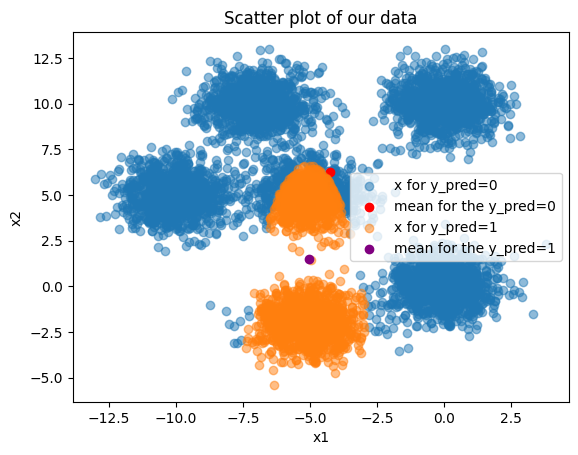

In [26]:
mean_0 = gaussian_naive_bayes.models[0].mean
X_y_pred_0 = X[y_pred==0]

mean_1 = gaussian_naive_bayes.models[1].mean
X_y_pred_1 = X[y_pred==1]

plt.figure()
plt.title("Scatter plot of our data")
plt.scatter(X_y_pred_0[:, 0], X_y_pred_0[:, 1], alpha=0.5, label="x for y_pred=0")
plt.scatter(mean_0[ 0], mean_0[ 1], label="mean for the y_pred=0", color="red")
plt.scatter(X_y_pred_1[:, 0], X_y_pred_1[:, 1], alpha=0.5, label="x for y_pred=1")
plt.scatter(mean_1[ 0], mean_1[ 1], label="mean for the y_pred=1", color="purple")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Step 2.  Bayesian Classifier with Gaussian mixture model

Implement the Bayesian Classifier with Gaussian mixture model.
The model is as before, but instead of using the Gaussian Distribution to model the P(x|y) for each class, we use a mixture of Gaussian's.

So you have to find the parameters of a GMM ($w_k$, $m_k$, $cov_k$) for each different y.  
note: To fit the gmm of each class y you can use the sklearn as we demonstrate before

Fill the class below and use it to get:  
1. fit your model using .fit() method
2. the propabilities of each class for the different x using .predict_proba() method
3. make the final predictions using the .predict() method and calculate the accuracy of your model
4. compare the result with the gaussian bayes classifier

First we will create a class for GMM to have the same API as scipy multivariate gausssian in order to change the minim in our code

In [29]:
class GMM(object):
    def __init__(self, mean, cov, w):
        self.k = len(means)  # components
        self.mean = mean
        self.cov = cov
        self.w = w

    def pdf(self, x):
        p_x = 0
        for k in range(self.k):
            p_x += self.w[k] * mvn(mean=self.mean[k], cov=self.cov[k]).pdf(x)
        return p_x

In [30]:
class GaussianMixtureNaiveBayesClassifier:
    """
    Implementation of Gaussian Mixture Naive Bayes Classifier
    """
    def __init__(self):
        # initialization of required variables.
        self.models = None  # p(x|y)
        self.prior = None  # p(y)
        self.classes = None # the classes
        self.n_classes = None # number of classes
        self.n_features = None # dimension of the features


    def fit(self, X, y, n_components):
        """
        Calculate the parameters of the gaussian models for each class i.e P(x|y), as well as the prior class probabilities P(y).
        :param X: The input features
        :param y: The labels
        :return: nothing
        """
        self.n_features = X.shape[1]
        num_of_points= X.shape[0]
        
        self.classes = list(set(y))
        self.n_classes = len(set(y))
        
        #
        self.prior = np.zeros(self.n_classes)
        self.models = []
        for y_index in range(self.n_classes):
            
            class_y = self.classes[y_index]
            # 1. Calculate the prior P(y) for each class
            p_y = (y == class_y).sum()/ num_of_points
            self.prior[y_index] =  p_y
            
            # 2. Calculate the different model P(x|y)
            # we will find the parameters of the gaussian for each class
            data_x_y = X[y == class_y] # get the data that only in class y
            gmm = GaussianMixture(n_components=n_components, covariance_type="diag")
            gmm.fit(data_x_y)
            w_y = gmm.weights_
            mean_x_y = gmm.means_ # calculate the mean
            diag_cov_x_y = gmm.covariances_ # calculate the covariance matrix, Note that you have to set rowvar=False
            
            self.models += [GMM(mean=mean_x_y, cov=diag_cov_x_y, w=w_y)] # add the model p(x|y) in your model list
        
    def predict_proba(self, X):
        """
        Calculate the posterior probability of each class given the features, i.e. P(y|x).
        You can calculate this with Bayes's theorem:
                    P(y|x) = P(x|y) P(y) / P(x).
                    P(y|x): The Posterior probability
                    P(x|y): The Likelihood probability
                    P(y): Prior probability
                    P(x): The evidence \sum_{y'} P(x|y') P(y')
        :param X:
        :return:
        """
        # get general information
        n_examples = X.shape[0]

        # initise posterior
        posterior = np.zeros([self.n_classes, n_examples])
        
        # numerator: p(x|y)p(y)
        numerator = np.zeros((n_examples,self.n_classes))
        
        # calculate p(x|y) p(y) for each y
        for y_index in range(self.n_classes):
            # calculate p(x|y=tmp_y) * p(y_tmp) for all the examples
            p_x_y = self.models[y_index].pdf(X)# p(x|y)
            p_y = self.prior[y_index] # p(y)
            numerator[:, y_index] = p_x_y * p_y # p(x|y) p(y)
        
        # denominator aka evidence p(x) = \sum_{y'} P(x|y') P(y')
        denominator = np.sum(numerator, axis=1) #  so is the sum of the numerator
        
        posterior = numerator / denominator.reshape(-1,1)
        return posterior
    

    def predict(self, X):
        """
        Make predicted class with the maximum posterior P(y|x)
        :param X:
        :return: the predicted class
        hint: use the predict_proba class
        """
        posterior = self.predict_proba(X)
        prediction = np.argmax(posterior, axis=1)
        return prediction

In [31]:
# initial the classifier object
gaussian_naive_bayes = GaussianMixtureNaiveBayesClassifier()

# fit the model
gaussian_naive_bayes.fit(X=X,y=Y, n_components= 10)

In [32]:
# get predict propabilities for each class
predicted_proba = gaussian_naive_bayes.predict_proba(X)
predicted_proba

array([[9.99999773e-01, 2.26820625e-07],
       [9.99999965e-01, 3.52129555e-08],
       [9.99999999e-01, 1.20387717e-09],
       ...,
       [3.59787205e-04, 9.99640213e-01],
       [9.45922372e-08, 9.99999905e-01],
       [6.67247242e-07, 9.99999333e-01]])

In [33]:
# check that sum to 1, note that there may be a small descrepancies due to numerical error
predicted_proba.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [34]:
# get predict propabilities for each class
y_pred = gaussian_naive_bayes.predict(X)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = Y, y_pred=y_pred)

0.9903333333333333

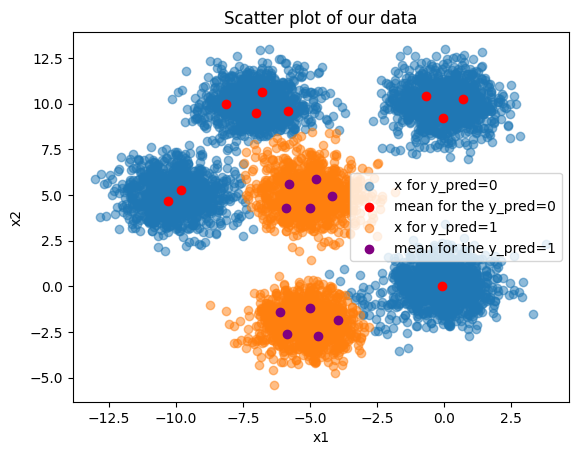

In [36]:
mean_0 = gaussian_naive_bayes.models[0].mean
X_y_pred_0 = X[y_pred==0]

mean_1 = gaussian_naive_bayes.models[1].mean
X_y_pred_1 = X[y_pred==1]

plt.figure()
plt.title("Scatter plot of our data")
plt.scatter(X_y_pred_0[:, 0], X_y_pred_0[:, 1], alpha=0.5, label="x for y_pred=0")
plt.scatter(mean_0[:, 0], mean_0[:, 1], label="mean for the y_pred=0", color="red")
plt.scatter(X_y_pred_1[:, 0], X_y_pred_1[:, 1], alpha=0.5, label="x for y_pred=1")
plt.scatter(mean_1[:, 0], mean_1[:, 1], label="mean for the y_pred=1", color="purple")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

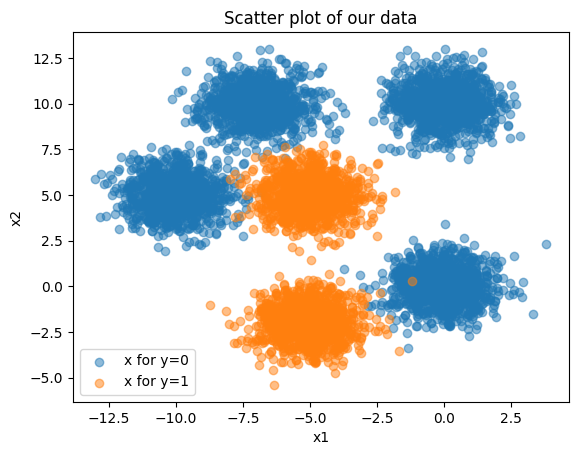

In [37]:
plt.figure()
plt.title("Scatter plot of our data")
plt.scatter(X_y_0[:, 0], X_y_0[:, 1], alpha=0.5, label="x for y=0")
plt.scatter(X_y_1[:, 0], X_y_1[:, 1], alpha=0.5, label="x for y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()